In [12]:
from wearsed.training.metric import get_precision_recall, calc_f1_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
runs = [
    ('new_baseline_BN', 31),
    ('pleth_pre_stat', 49),
    ('pleth_pre_vae', 49),
    ('pleth_pre_stat_vae', 49)
]

In [9]:
metrics

{'precision': [0.5299220756479104,
  0.801043612152664,
  0.8215448204598295,
  0.8343743861716755],
 'recall': [0.7405379501610996,
  0.5746341164077442,
  0.6123128760529483,
  0.656463461122387],
 'f1': [0.6177721450079106,
  0.669207589418645,
  0.7016630353843184,
  0.7348033166883857]}

In [20]:
run_names = ['In-model', 'Statistical', 'VAE', 'Statistical + VAE']
metrics = {
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
for run, epoch in runs:
    print(f'### {run}')
    output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{epoch}.csv')
    y_pred, y_true = output['predictions'], output['targets']
    precision, recall = get_precision_recall(y_pred, y_true, 0.4, False, correctify_size=3)
    f1 = calc_f1_score(precision, recall)
    print(f'Precision: {precision*100:.1f}%, Recall: {recall*100:.1f}%, F1: {f1*100:.1f}%')
    metrics['Precision'].append(round(precision, 3))
    metrics['Recall'].append(round(recall, 3))
    metrics['F1-Score'].append(round(f1, 3))

### new_baseline_BN
Precision: 79.4%, Recall: 66.4%, F1: 72.3%
### pleth_pre_stat
Precision: 80.1%, Recall: 57.5%, F1: 66.9%
### pleth_pre_vae
Precision: 82.2%, Recall: 61.2%, F1: 70.2%
### pleth_pre_stat_vae
Precision: 83.4%, Recall: 65.6%, F1: 73.5%


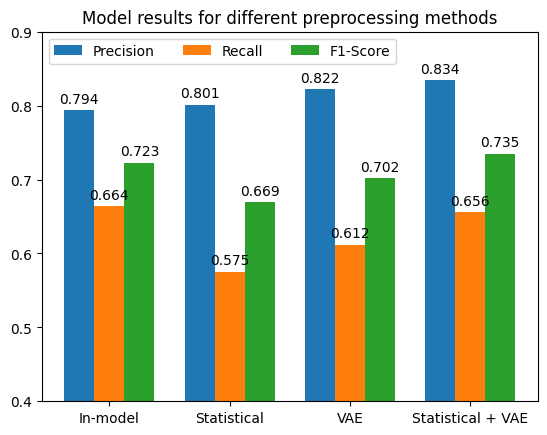

In [23]:
x = np.arange(len(run_names))
width = 0.25
multiplier = 0
fig, ax = plt.subplots()

for metric, value in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=metric)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Model results for different preprocessing methods')
ax.set_xticks(x + width, run_names)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.4, 0.9)

plt.show()